In [ ]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data={
    "Hours":[1.5,2.7,8,1,0,5,4.5,10,20,3,9,7,6.5,11,15,17,18,21,8.5,0.5]
}
data["Scores"]=[5*h + 5 + random.randint(-5,5) for h in data["Hours"]]
print(data)

{'Hours': [1.5, 2.7, 8, 1, 0, 5, 4.5, 10, 20, 3, 9, 7, 6.5, 11, 15, 17, 18, 21, 8.5, 0.5], 'Scores': [10.5, 20.5, 41, 11, 10, 27, 29.5, 52, 107, 20, 47, 45, 33.5, 62, 75, 87, 98, 109, 44.5, 8.5]}


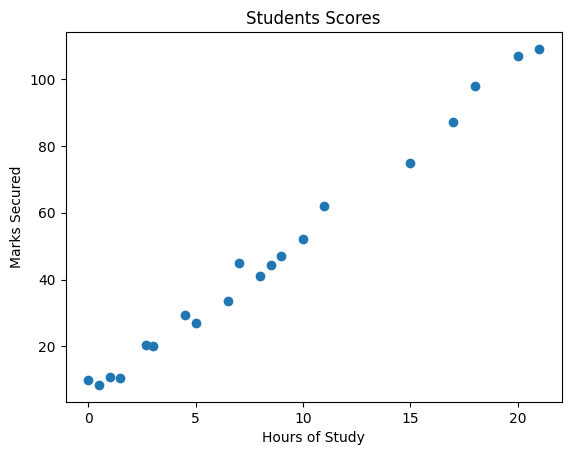

In [4]:
df=pd.DataFrame(data)
plt.scatter(df["Hours"],df["Scores"])
plt.xlabel("Hours of Study")
plt.ylabel("Marks Secured")
plt.title("Students Scores")
plt.show()

In [28]:
def predict(x,w,b):
    return w*x+b


In [22]:
def compute_cost(x,y,w,b):
    m=len(x)
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost+=(f_wb-y[i])**2
    return cost/2*m

In [23]:
def compute_gradients(x,y,w,b):
    m=len(x)
    dj_dw,dj_db=0,0
    error_w,error_b=0,0
    for i in range(m):
        f_wb=w*x[i]+b
        error_w+=(f_wb-y[i])*x[i]
        error_b+=f_wb-y[i]
        dj_dw=error_w/m
        dj_db=error_b/m
    return dj_dw,dj_db

In [24]:
def compute_Values(x,y,w_init,b_init,alpha,num_iterations):
    w,b=w_init,b_init
    for i in range(num_iterations):
        dj_dw,dj_db=compute_gradients(x,y,w,b)
        w=w-alpha*dj_dw
        b=b-alpha*dj_db
        if i%100==0:
            cost=compute_cost(x,y,w,b)
            print(f"Iteration {i}: Cost={cost:.4f}, w={w:.4f}, b={b:.4f}")
    return w,b

In [25]:
import numpy as np
X=np.array(df["Hours"])
Y=np.array(df["Scores"])
w_final,b_final=compute_Values(X,Y,w_init=0,b_init=0,alpha=0.01,num_iterations=1000)
print(f"w = {w_final:.4f}, b = {b_final:.4f}")

Iteration 0: Cost=16663.3518, w=6.0376, b=0.4690
Iteration 100: Cost=2598.5229, w=5.1687, b=1.9246
Iteration 200: Cost=2154.7282, w=5.0907, b=2.9701
Iteration 300: Cost=1942.5757, w=5.0367, b=3.6930
Iteration 400: Cost=1841.1579, w=4.9994, b=4.1927
Iteration 500: Cost=1792.6760, w=4.9736, b=4.5383
Iteration 600: Cost=1769.4996, w=4.9557, b=4.7772
Iteration 700: Cost=1758.4203, w=4.9434, b=4.9424
Iteration 800: Cost=1753.1239, w=4.9349, b=5.0566
Iteration 900: Cost=1750.5920, w=4.9290, b=5.1356
w = 4.9249, b = 5.1897


In [38]:

predicted_score=predict(2,w_final,b_final)
print(predicted_score)

15.03959908527116


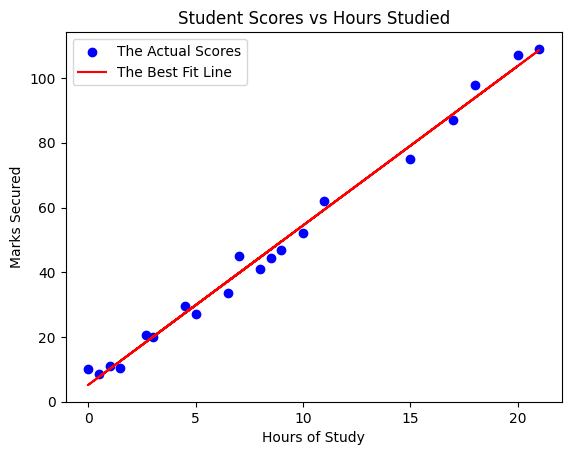

In [35]:
plt.scatter(df["Hours"],df["Scores"],color='blue',label='The Actual Scores')
predicted_Y=w_final*X+b_final
plt.plot(X,predicted_Y,color='red',label='The Best Fit Line')
plt.xlabel("Hours of Study")
plt.ylabel("Marks Secured")
plt.title("Student Scores vs Hours Studied")
plt.legend()
plt.show()